In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("df_preprocessed.csv")

In [3]:
df.head()

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
0,N,Spain,H,35,0.0,6,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2015,1,0,1.0,1
1,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
2,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
3,N,Spain,H,22,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
4,N,Spain,V,23,0.0,35,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,2


In [4]:
df.shape

(606657, 45)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606657 entries, 0 to 606656
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   emp_index                606657 non-null  object 
 1   cust_residence           606657 non-null  object 
 2   cust_gender              606657 non-null  object 
 3   age                      606657 non-null  int64  
 4   new_cust_index           606657 non-null  float64
 5   cust_seniority           606657 non-null  int64  
 6   indrel                   606657 non-null  float64
 7   cust_type                606657 non-null  float64
 8   cust_rel_time            606657 non-null  object 
 9   cust_res_index           606657 non-null  int64  
 10  is_foreign               606657 non-null  int64  
 11  channel_to_join          606657 non-null  object 
 12  deceased_index           606657 non-null  int64  
 13  name_province            606657 non-null  object 
 14  acti

In [6]:
df['total_accounts'].describe()

count    606657.000000
mean          1.640566
std           1.312099
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: total_accounts, dtype: float64

In [7]:
df.isnull().sum()

emp_index                  0
cust_residence             0
cust_gender                0
age                        0
new_cust_index             0
cust_seniority             0
indrel                     0
cust_type                  0
cust_rel_time              0
cust_res_index             0
is_foreign                 0
channel_to_join            0
deceased_index             0
name_province              0
activity_index             0
household_income           0
saving_acc                 0
guarantees                 0
current_acc                0
derivada_acc               0
payroll_acc                0
junior_acc                 0
mass_particular_acc        0
particular_acc             0
particular_plus_acc        0
short_term_deposit         0
medium_term_deposits       0
long_term_deposits         0
e_account                  0
funds                      0
mortgage                   0
pensions1                  0
loans                      0
taxes                      0
credit_card   

In [8]:
df_new = df[['age', 'household_income', 'total_accounts']].copy()
df_new.head()

,age,household_income,total_accounts
0,35,87218.10,1.0
1,23,35548.74,1.0
2,23,122179.11,1.0
3,22,119775.54,1.0
4,23,100700.64,1.0


In [9]:
X_train = df_new.values
kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

In [10]:
no_of_clusters = range(2,7) 
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 1.1757120440886222e+16
The innertia for : 3 Clusters is: 8126848401849368.0
The innertia for : 4 Clusters is: 5356215954952022.0
The innertia for : 5 Clusters is: 3658422265554836.5
The innertia for : 6 Clusters is: 2440789652124185.5


Text(0.5, 1.0, 'Elbow Method')

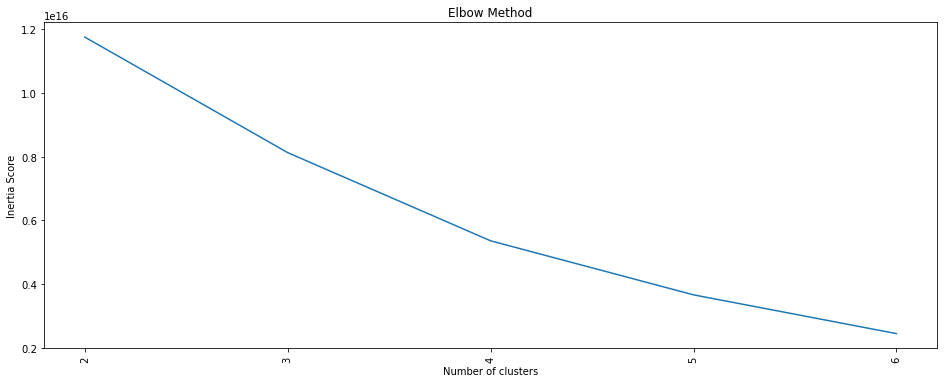

In [11]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Elbow Method")

In [12]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)
kmeans.labels_
predictions = kmeans.predict(X_train)
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,53380,552815,85,362,15


<Figure size 432x288 with 0 Axes>

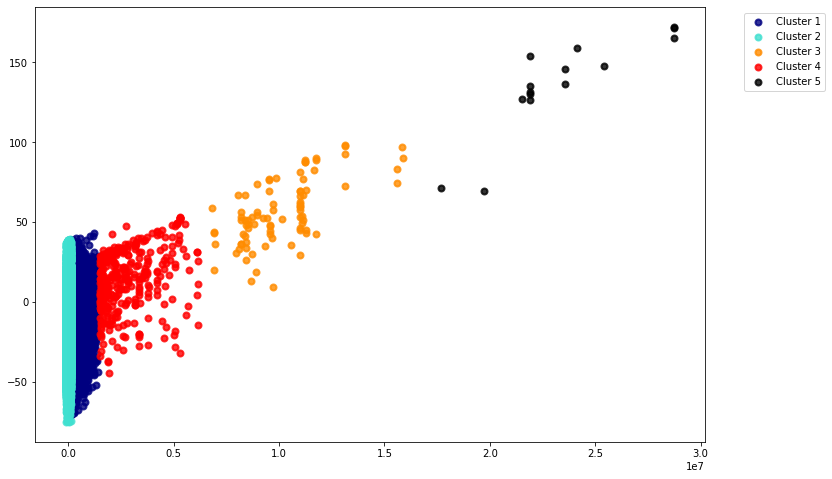

In [13]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4","Cluster 5"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.show()